## Details

#### Name: Akshat Toolaj Sinha
#### Entry Number: 2020CSB1068
#### Equity: Tech Mahindra

## Libraries & Constants

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import yfinance as yf
import datetime
import os
import matplotlib.dates as mdates

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]
sns.set_palette('flare')
sns.set_style("darkgrid")
sns.despine()


<Figure size 1200x800 with 0 Axes>

In [4]:
TICKER='TECHM.NS'
PERIOD='max'
FILE_NAME='TECH_MAHINDRA.csv'
PRICE_ANALYSIS='Close'
EQUITY_NAME='Tech Mahindra'
SIGNIFICANCE_LEVEL=0.05
TRADING_DAYS=252
OPTION_EXPIRY=datetime.date(2024,5,31)
TODAY=datetime.date.today()

# Risk Free Rate for 3 months
RISK_FREE_RATE= 6.88

## Data Downloading & Augmentation

In [5]:
Equity_df=yf.download(TICKER,period=PERIOD,auto_adjust=True)

[*********************100%%**********************]  1 of 1 completed


In [6]:
Equity_df.reset_index(inplace=True)
Equity_df = Equity_df.round(4)

In [7]:
Equity_df.to_csv(FILE_NAME,index=False)

## Data Visualization

Plotting Equity price 

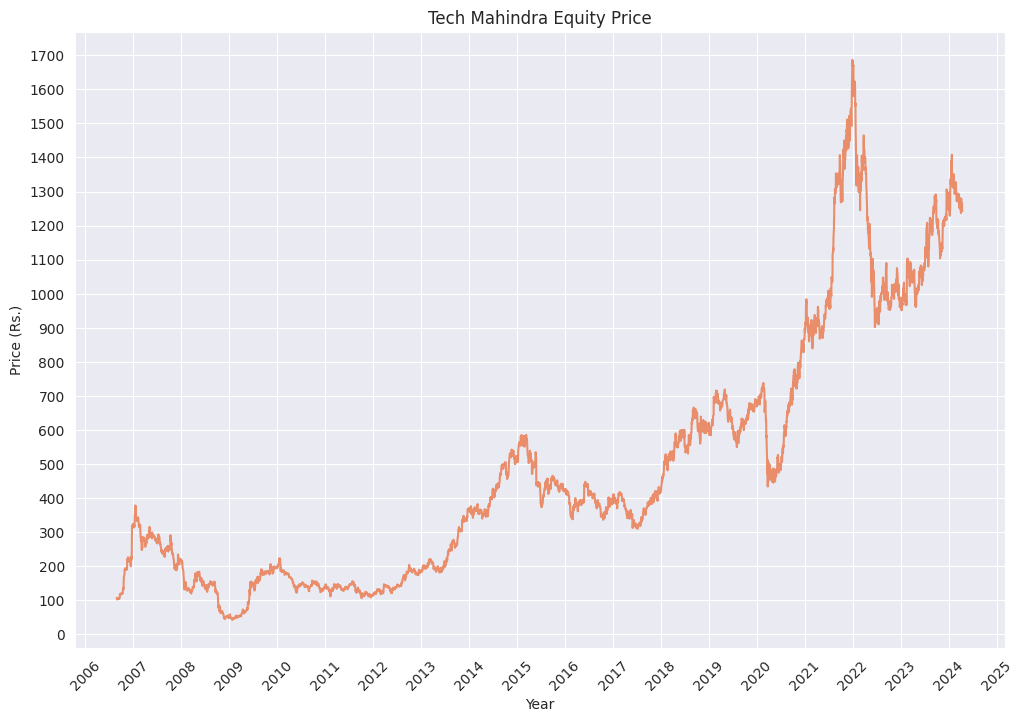

In [8]:
sns.lineplot(data=Equity_df,x='Date',y=PRICE_ANALYSIS)
plt.xlabel("Year")
plt.ylabel("Price (Rs.)")
plt.title(EQUITY_NAME+ " Equity Price")
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.yticks(range(0,int(max(Equity_df[PRICE_ANALYSIS]))+100,100))
plt.show()

Plotting Log Returns

In [9]:
log_returns=np.log(Equity_df[PRICE_ANALYSIS]/Equity_df[PRICE_ANALYSIS].shift(1))

In [10]:
log_returns=log_returns.dropna()
log_returns.reset_index(drop=True,inplace=True)

In [11]:
log_returns=log_returns*100

In [12]:
dates=Equity_df['Date'][1:]

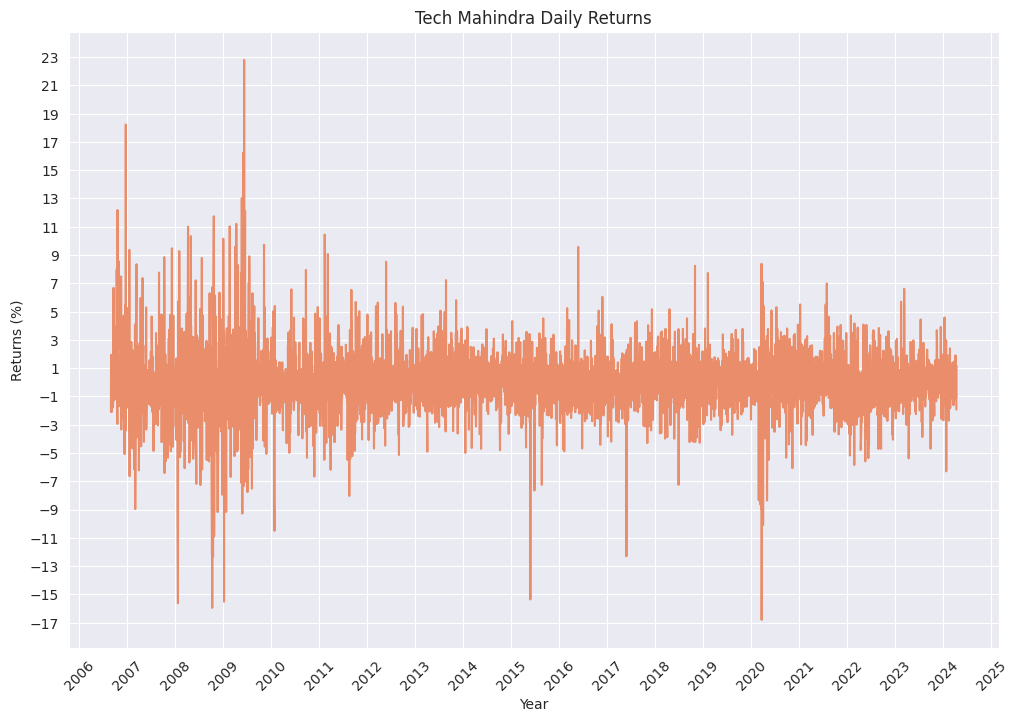

In [13]:
sns.lineplot(x=dates,y=log_returns)
plt.xlabel("Year")
plt.ylabel("Returns (%)")
plt.title(EQUITY_NAME+" Daily Returns")
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.yticks(np.arange(int(min(log_returns))-1,max(log_returns)+1,2))
plt.show()

## Normality Tests

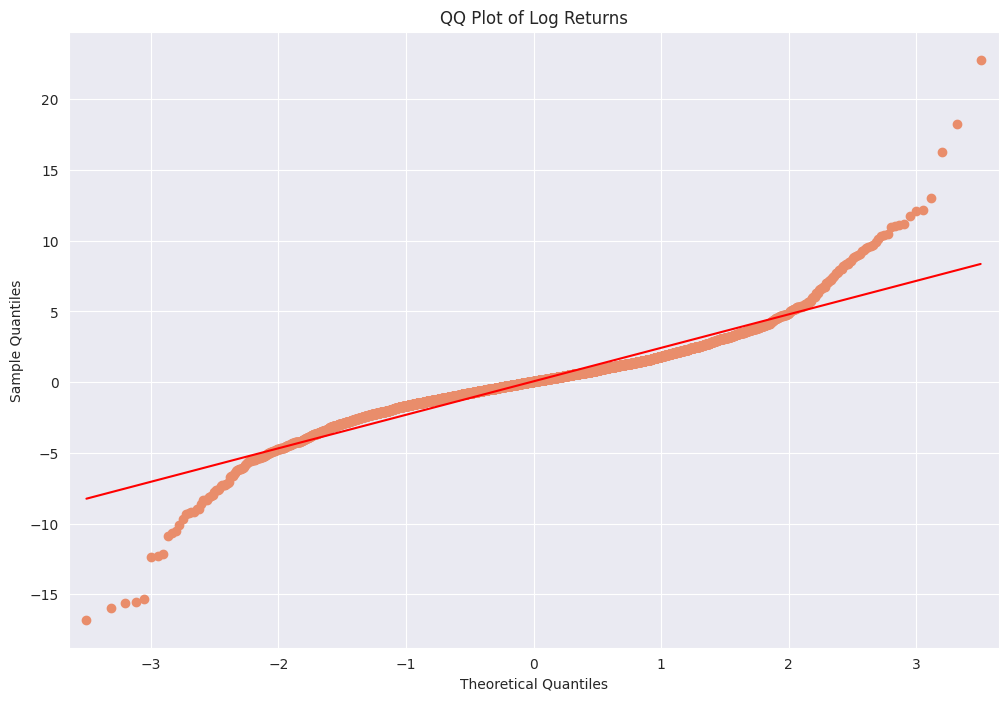

In [14]:
from statsmodels.graphics.gofplots import qqplot

qqplot(log_returns,line='s')
plt.title("QQ Plot of Log Returns")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

<AxesSubplot:xlabel='Close', ylabel='Count'>

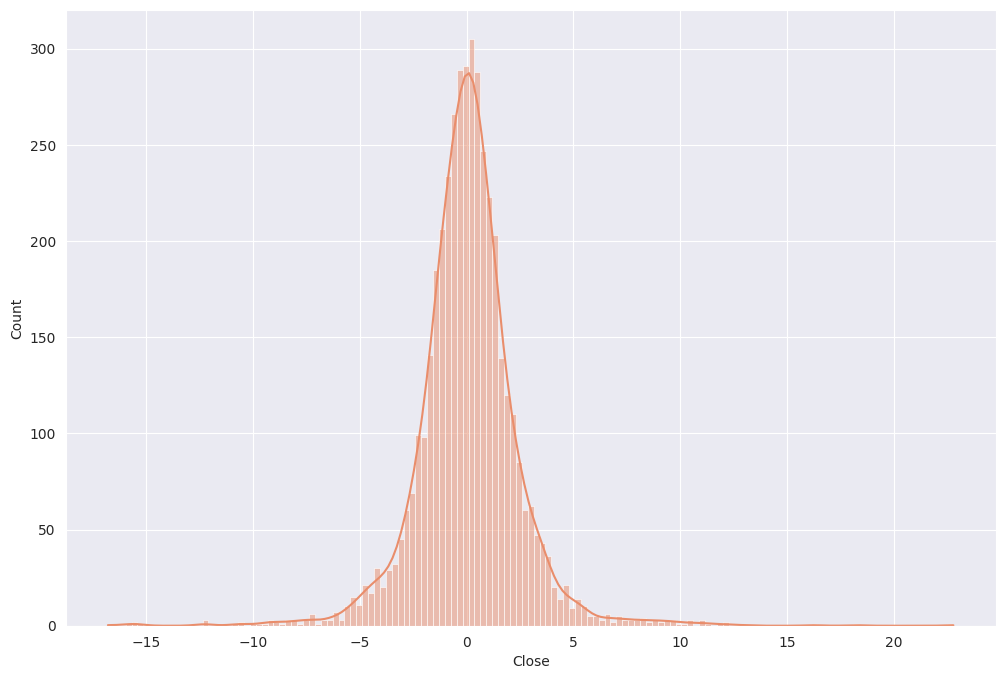

In [15]:
sns.histplot(log_returns,kde=True)

In [16]:
print("Mean of Log Returns: ",round(log_returns.mean(),4))
print("Standard Deviation of Log Returns: ",round(log_returns.std(),4))
print("Skewness of Log Returns: ",round(log_returns.skew(),4))
print("Kurtosis of Log Returns: ",round(log_returns.kurtosis(),4))

Mean of Log Returns:  0.0568
Standard Deviation of Log Returns:  2.3699
Skewness of Log Returns:  0.1995
Kurtosis of Log Returns:  8.6154


In [17]:
# Jarque-Bera Test
from scipy.stats import jarque_bera


jb_test=jarque_bera(log_returns)
print("Jarque-Bera Test Statistic: ",jb_test[0])
print("Jarque-Bera Test P-Value: ",jb_test[1])

if jb_test[1]<SIGNIFICANCE_LEVEL:
    print("\nReject Null Hypothesis: The data is not normally distributed")
else:
    print("\nFail to Reject Null Hypothesis : The data is normally distributed")

Jarque-Bera Test Statistic:  13431.470362929414
Jarque-Bera Test P-Value:  0.0

Reject Null Hypothesis: The data is not normally distributed


In [18]:
# use Kolmogorov-Smirnov test to check normality

from scipy.stats import kstest

ks_test=kstest(log_returns,'norm')

print("\nKolmogorov-Smirnov Test Statistic: ",ks_test.statistic)
print("Kolmogorov-Smirnov Test P-Value: ",ks_test.pvalue)

if ks_test.pvalue<SIGNIFICANCE_LEVEL:
    print("\nReject Null Hypothesis: The data is not normally distributed")
else:
    print("\nFail to Reject Null Hypothesis : The data is normally distributed")


Kolmogorov-Smirnov Test Statistic:  0.13129939834049464
Kolmogorov-Smirnov Test P-Value:  8.959269102979624e-66

Reject Null Hypothesis: The data is not normally distributed


In [19]:
# use Shapiro-Wilk test to check normality

from scipy.stats import shapiro

shapiro_test=shapiro(log_returns)

print("\nShapiro-Wilk Test Statistic: ",shapiro_test[0])
print("Shapiro-Wilk Test P-Value: ",shapiro_test[1])

if shapiro_test[1]<SIGNIFICANCE_LEVEL:
    print("\nReject Null Hypothesis: The data is not normally distributed")
else:
    print("\nFail to Reject Null Hypothesis : The data is normally distributed")


Shapiro-Wilk Test Statistic:  0.9121820330619812
Shapiro-Wilk Test P-Value:  1.2611686178923354e-44

Reject Null Hypothesis: The data is not normally distributed


## Returns Analysis

In [20]:
historical_volatility=np.std(log_returns)
print("\nHistorical Daily Volatility (%): ",historical_volatility)
print("Historical Annual Volatility (%): ",historical_volatility*math.sqrt(TRADING_DAYS))


Historical Daily Volatility (%):  2.369671857261517
Historical Annual Volatility (%):  37.61737453885514


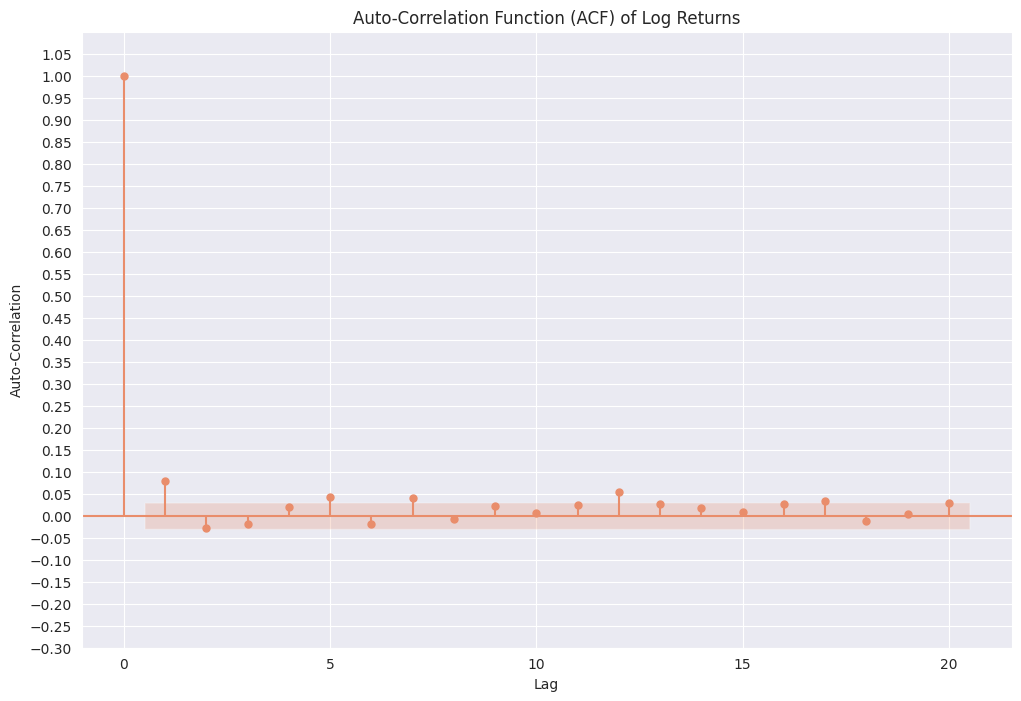

In [21]:
# Check for auto correlation in log_returns

import statsmodels.api as sm

sm.graphics.tsa.plot_acf(log_returns,lags=20)
plt.xlabel('Lag')
plt.ylabel("Auto-Correlation")
plt.title("Auto-Correlation Function (ACF) of Log Returns")
plt.ylim(-0.3,1.1)
plt.yticks(np.arange(-0.3,1.1,0.05))
plt.show()



## Volatility Modelling